In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/hupili/python-for-data-and-media-communication/master/text-analysis/regular_reader_tweets.csv')
print('The length of df is {}'.format(len(df)))
df.tail()

the length of df is 203482


,user_key,created_str,text
203477,nojonathonno,11/1/2016 12:13,"RT @AndreaChalupa: In intel circles, the story..."
203478,judelambertusa,6/18/2015 1:04,RT @KansasCityDNews: Tonganoxie police: Middle...
203479,patriotblake,1/10/2017 18:50,RT @signsinyork: Getting the right #company lo...
203480,dailysandiego,11/20/2016 21:49,The Latest: Obama affirms continuity of ties w...
203481,willisbonnerr,12/19/2016 23:00,RT @futureguru100: U cant just Upload a CD onl...


In [4]:
df = df.sample(frac=0.1)
print('After resample, the length of df is {}'.format(len(df)))
df.tail()

After resample, the length of df is 20348


,user_key,created_str,text
51456,ten_gop,7/11/2016 4:10,Sheriff Clarke: 'Obama Is Like a Pyromaniac Wh...
122682,thefoundingson,1/14/2017 16:15,Manual for dummies\r\n#tcot #pjnet https://t.c...
183231,patriotblake,10/7/2016 8:16,RT @yournewswire: Snopes Caught Lying For Hill...
193656,ten_gop,10/2/2016 1:37,VIDEO: Loud Islamic call to prayer in Michigan...
13992,giselleevns,12/14/2016 15:29,RT @serradicassano: #GiftIdeasForPoliticians A...


In [59]:
from datetime import datetime
from dateutil import parser
import numpy
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['created_str'].apply(parse_datetime)
df.head()

,user_key,created_str,text,datetime
44413,evagreen69,12/29/2015 9:37,RT @realDonaldTrump: The voters the Republican...,2015-12-29 09:37:00
165333,cassieweltch,12/21/2016 16:26,Some cool kicks #SecondhandGifts https://t.co/...,2016-12-21 16:26:00
17515,lazykstafford,12/3/2016 5:13,RT @Franklin_Graham: They’re trying for a medi...,2016-12-03 05:13:00
113998,peterkistner,7/21/2016 11:20,@Gisela_Piltz würde Frau Merkel 4. Amtszeit sc...,2016-07-21 11:20:00
84809,patriotblake,2/15/2017 2:46,RT @youlivethrice: Shepard Smith bleeds libera...,2017-02-15 02:46:00


In [60]:
def has_hillary(t):
    return 'hillary' in str(t).lower()
def has_trump(t):
    return 'trump' in str(t).lower()
df['kw-hillary'] = df['text'].apply(has_hillary)
df['kw-trump'] = df['text'].apply(has_trump)
df.set_index('datetime').resample('1w').aggregate('sum').tail()

,kw-hillary,kw-trump
datetime,,
2017-08-13,0.0,1.0
2017-08-20,0.0,0.0
2017-08-27,0.0,0.0
2017-09-03,0.0,0.0
2017-09-10,0.0,0.0


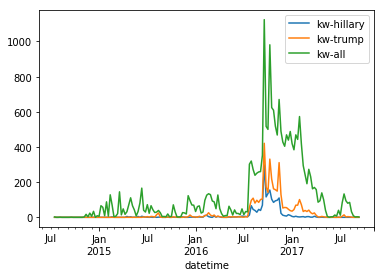

In [61]:
df.set_index('datetime').resample('1w').aggregate('sum').tail()
df['kw-all'] = df['text'].apply(lambda x: 1)
df.set_index('datetime').resample('1w').aggregate('sum').plot()

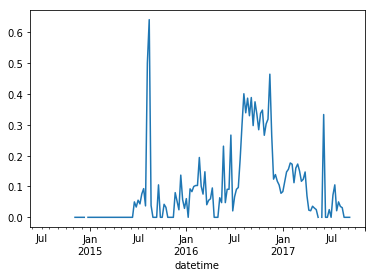

In [62]:
df_kws = df.set_index('datetime').resample('1w').aggregate('sum')
(df_kws['kw-trump'] / df_kws['kw-all']).plot()

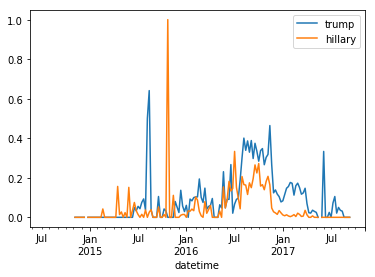

In [63]:
s_trump_ratio = (df_kws['kw-trump'] / df_kws['kw-all'])
s_hillary_ratio = (df_kws['kw-hillary'] / df_kws['kw-all'])
pd.DataFrame({'trump':s_trump_ratio, 'hillary': s_hillary_ratio}).plot()

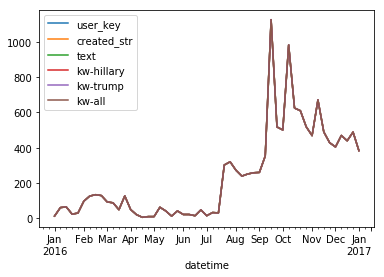

In [64]:
df[
    (df['datetime'] > datetime(2016, 1, 1)) &
    (df['datetime'] < datetime(2017, 1, 1))
].set_index('datetime').resample('1w').aggregate('count').plot()

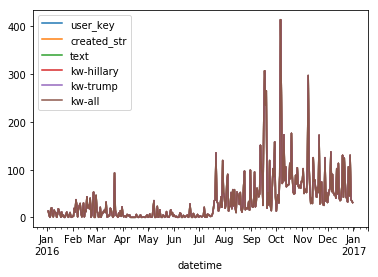

In [65]:
df[
    (df['datetime'] > datetime(2016, 1, 1)) &
    (df['datetime'] < datetime(2017, 1, 1))
].set_index('datetime').resample('1d').aggregate('count').plot()

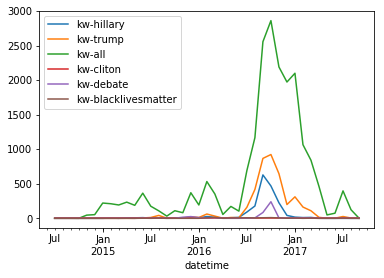

In [66]:
df['kw-cliton'] = df['text'].apply(lambda t: 'cliton' in str(t).lower())
df['kw-debate'] = df['text'].apply(lambda t: 'debate' in str(t).lower())
df['kw-blacklivesmatter'] = df['text'].apply(lambda t: 'blacklivesmatter' in str(t).lower())
df_kws = df.set_index('datetime').resample('1m').aggregate('sum')
df_kws.plot()

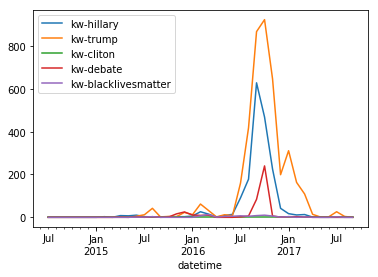

In [67]:
del df_kws['kw-all']
df_kws.plot()

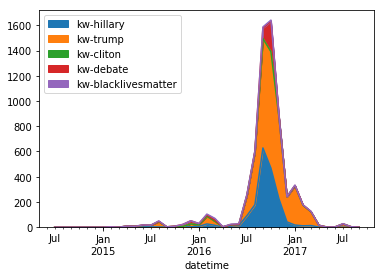

In [68]:
df_kws.plot(kind='area')

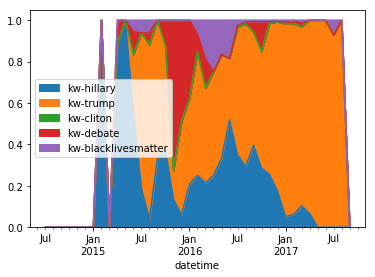

In [69]:
df_kws.divide(df_kws.sum(axis=1), axis=0).plot(kind='area')